# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np
plt.style.use('classic')
%matplotlib inline

 # Reading the Dataset

In [2]:
dataset = pd.read_csv("Salaries.csv")
rank = dataset['rank']
discipline = dataset['discipline']
phd = dataset['phd']
service = dataset['service']
sex = dataset['sex']
salary = dataset['salary']
dataset.head()


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


# Line Plot


**Visualizing Patterns with High Differences in Numerical
Units**

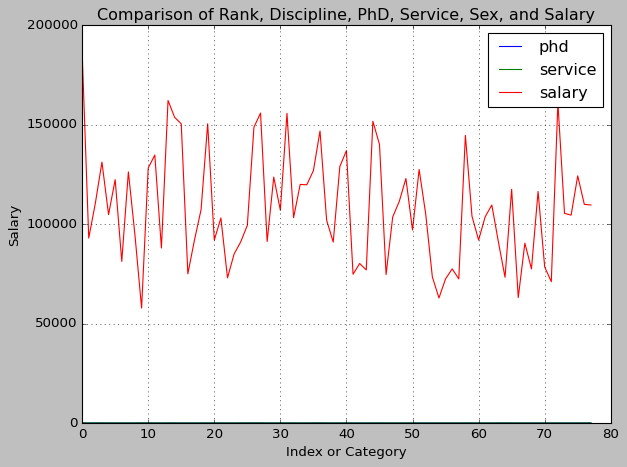

In [3]:
dataset[["rank", "discipline", "phd", "service", "sex", "salary"]].plot()

plt.title('Comparison of Rank, Discipline, PhD, Service, Sex, and Salary')
plt.xlabel('Index or Category')
plt.ylabel('Salary')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


*Only the salaries are visible, while the phd and serviceinformation is not clearly displayed on the plot. This is because the numerical units in the salaries are in the hundreds of thousands, while the phd and services information is in very small units.*

**Visualizing Patterns with Close Numerical Units**


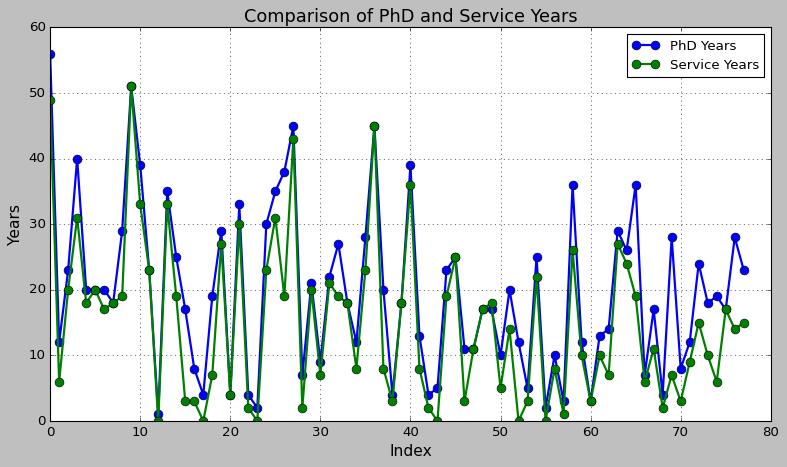

In [4]:
dataset[["phd", "service"]].plot(figsize=(10, 6), style='-o', markersize=8, linewidth=2)

#Adding labels and title with adjusted font sizes
plt.title('Comparison of PhD and Service Years', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Years', fontsize=14)
plt.grid(True)

#Adding legend with appropriate labels
plt.legend(['PhD Years', 'Service Years'], loc='best', fontsize=12)

#Adjusting tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


*You can observe the correlation
between phd and services over the years, except from age 55 up to 80,
where services decline, which means that some people left the service at
the age of 55 and older.*

**Visualizing Salaries per Service Category**

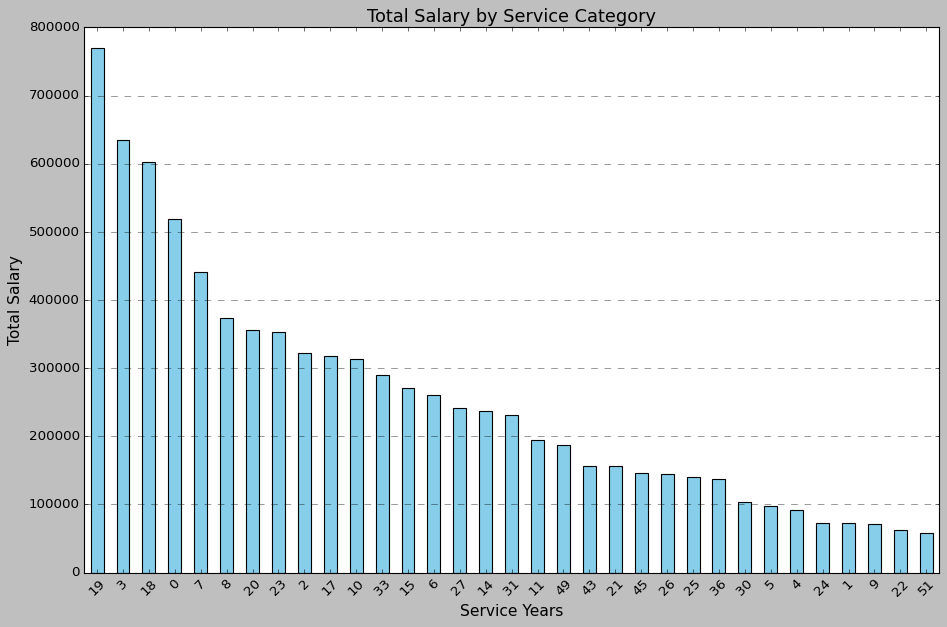

In [5]:
# Group by 'service' and sum up the salaries
dataset1 = dataset.groupby(['service']).sum()
dataset1.sort_values("salary", ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
ax = dataset1['salary'].plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Total Salary by Service Category', fontsize=16)
plt.xlabel('Service Years', fontsize=14)
plt.ylabel('Total Salary', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


*You can see that most people serve approximately 19 years, which is
why the highest accumulated salary is from this category.*

#Bar Plot

The bar plot visualizes the first 10 records from the dataset, comparing the number of Ph.D. years (phd) and service years (service) for each record.

<Figure size 800x480 with 0 Axes>

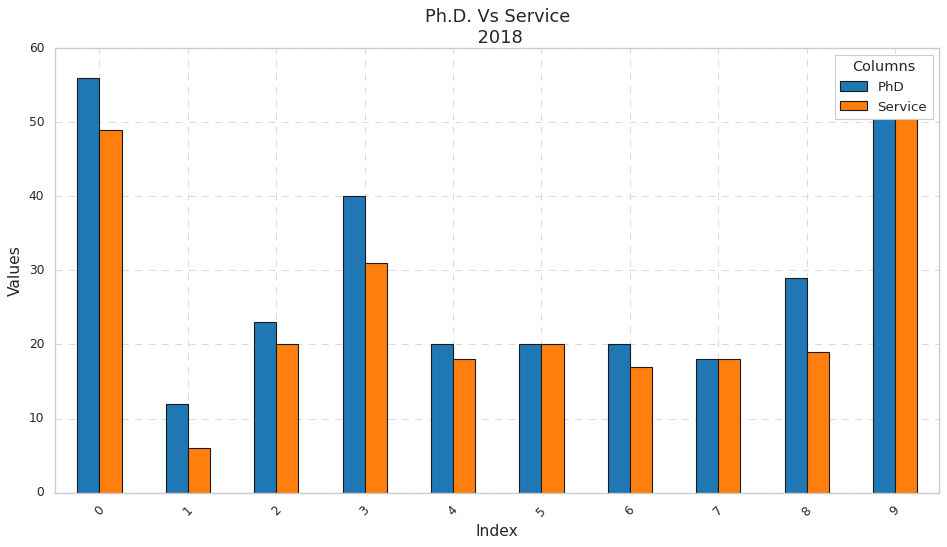

In [6]:
data = dataset[['phd', 'service']].head(10)

# Set the style and color palette for seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the data
ax = data.plot.bar(figsize=(12, 7), color=['#1f77b4', '#ff7f0e'], edgecolor='k')
ax.set_xlabel('Index', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Ph.D. Vs Service\n 2018', fontsize=16)
ax.legend(['PhD', 'Service'], title='Columns', title_fontsize='13', fontsize='12')
plt.xticks(rotation=45)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*Ph.D. Years: The Ph.D. years range from 1 to 56, with the lowest value being 1 year and the highest being 56 years.*

*Service Years: The service years range from 0 to 51, with the lowest value being 0 years and the highest being 51 years.*

*The plot shows that there is a wide variation in both Ph.D. and service years among the first 10 records. Some individuals have significantly less service years compared to their Ph.D. years, while others have a more balanced or varied distribution.*

#Pie Chart


<ipython-input-7-2b3d79ff1c6a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


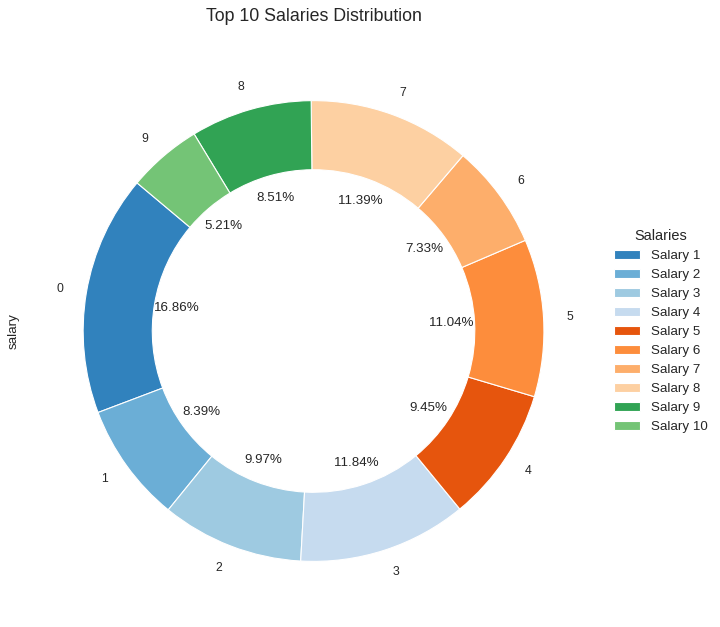

In [7]:
data = dataset["salary"].head(10)

# Set the style for matplotlib
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 8))

# Plot the pie chart
ax = data.plot.pie(
    autopct='%.2f%%',
    colors=plt.cm.tab20c.colors,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    startangle=140,
    legend=False
)
plt.title('Top 10 Salaries Distribution', fontsize=16, pad=20)

# Add a legend to the side
plt.legend(
    labels=[f'Salary {i+1}' for i in range(len(data))],
    title='Salaries',
    title_fontsize='13',
    fontsize='12',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()


*This visualization is a donut chart showing the proportion of the top 10 salaries in the dataset. It highlights the relative distribution among the highest earners, with the largest segment representing the highest salary. This suggests a notable disparity between the highest salary and the others within the top 10, indicating the presence of a few high earners in the organization.*

#Box plot


<ipython-input-8-e135a8d2e66a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


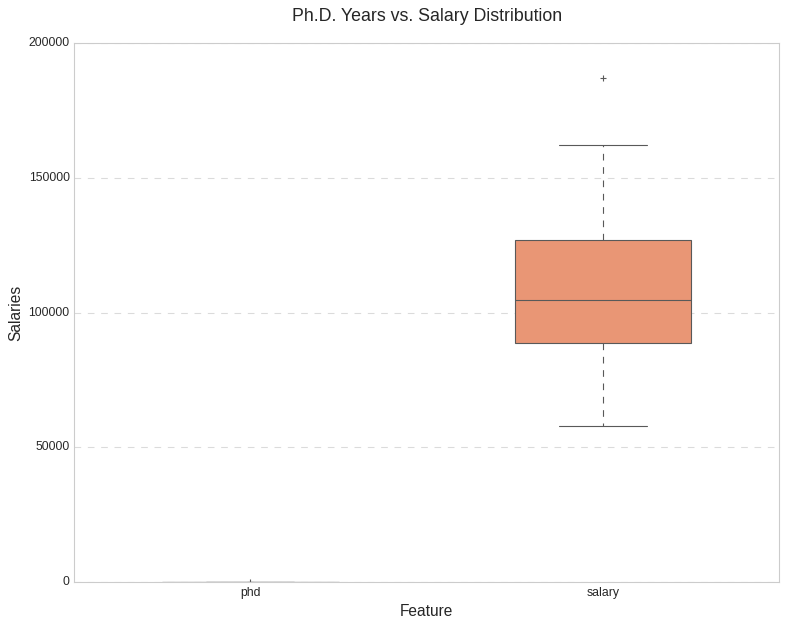

In [8]:
data = dataset[["phd", "salary"]].head(100)

# Set the style and color palette for seaborn
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 8))

# Plot the box plot
ax = sns.boxplot(data=data, orient='v', width=0.5, palette='Set2')
ax.set_xlabel('Feature', fontsize=14)
ax.set_ylabel('Salaries', fontsize=14)
ax.set_title('Ph.D. Years vs. Salary Distribution', fontsize=16, pad=20)
plt.xticks(rotation=0)

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*Since the salary numerical units are much higher than the phd numerical values
it produces improper figures and does not provide real comparison information*

<ipython-input-9-0874589c4e7e>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


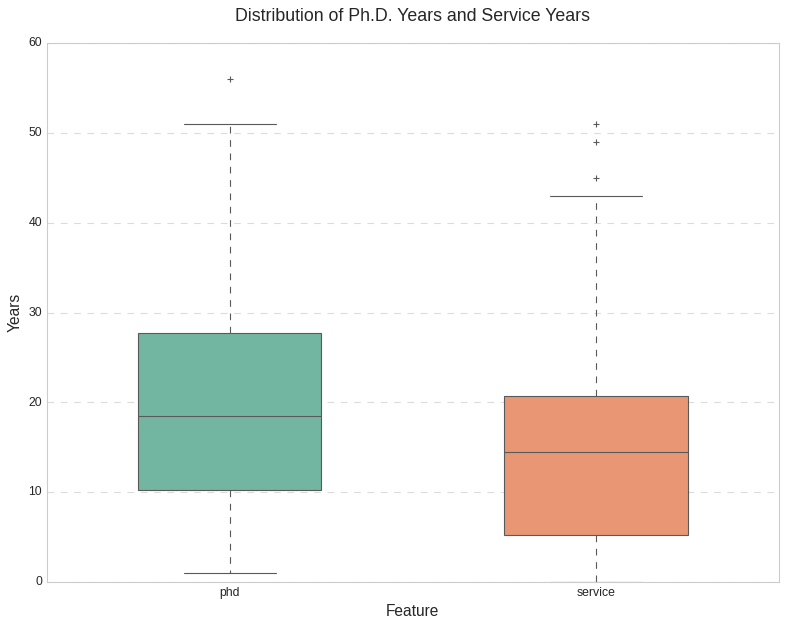

In [9]:
data = dataset[["phd", "service"]]

# Set the style and color palette for seaborn
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 8))

# Plot the box plot
ax = sns.boxplot(data=data, orient='v', width=0.5, palette='Set2')

# Customize labels and title
ax.set_xlabel('Feature', fontsize=14)
ax.set_ylabel('Years', fontsize=14)
ax.set_title('Distribution of Ph.D. Years and Service Years', fontsize=16, pad=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


*Plotting phd and services shows that the median and quantiles of phd
are higher than the median and quantiles of the service information;
in addition, the range of phd is wider than the range of service
information*

#Histogram Plot


**Listing 7-8.** Histogram Plotting

<ipython-input-10-fcf91f0de577>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


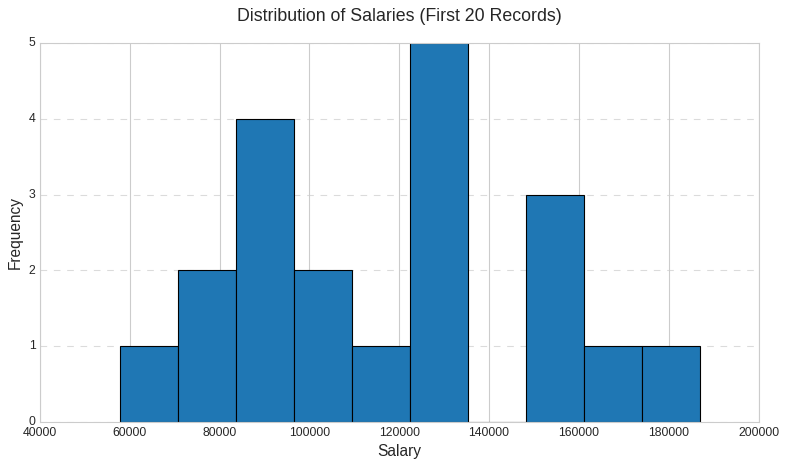

In [10]:
data = dataset["salary"].head(20)

# Set the style for matplotlib
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = data.plot.hist(bins=10, edgecolor='black', color='#1f77b4')

# Customize labels and title
ax.set_xlabel('Salary', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of Salaries (First 20 Records)', fontsize=16, pad=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*This histogram depicts the frequency distribution of the first 20 salary records.There is a noticeable peak around the 120,000 salary mark.The distribution shows a few high salaries, but most salaries are around 80,000 to 120,000.This indicates that in this subset, mid-range salaries are the most common.*

#Scatter Plot
The scatter plot visualizes the relationship between Ph.D. years and service years for a dataset of individuals.

<ipython-input-11-7774c6b33da1>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-11-7774c6b33da1>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=dataset['phd'], y=dataset['service'], alpha=0.7, s=50, edgecolor='black', cmap='viridis')


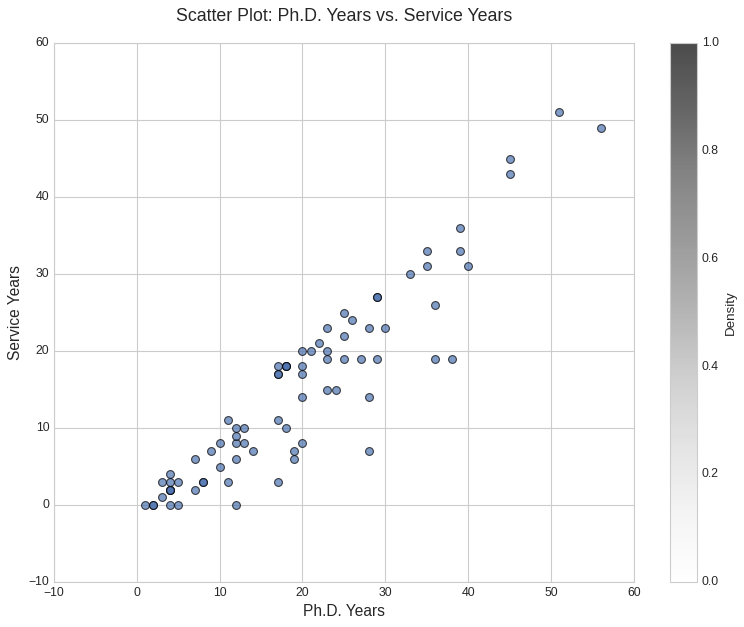

In [11]:
# Set the style for matplotlib
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 8))

# Plot the scatter plot
plt.scatter(x=dataset['phd'], y=dataset['service'], alpha=0.7, s=50, edgecolor='black', cmap='viridis')

# Customize labels and title
plt.xlabel('Ph.D. Years', fontsize=14)
plt.ylabel('Service Years', fontsize=14)
plt.title('Scatter Plot: Ph.D. Years vs. Service Years', fontsize=16, pad=20)

# Show color bar for better interpretation if applicable
plt.colorbar(label='Density')
plt.tight_layout()
plt.show()


*It reveals a positive correlation, indicating that as the number of Ph.D. years increases, so does the number of service years. This suggests a trend where individuals with more extensive Ph.D. training tend to accumulate more experience in their respective fields over time.*

#Seaborn Plotting System
**Displaying the data with salary category**

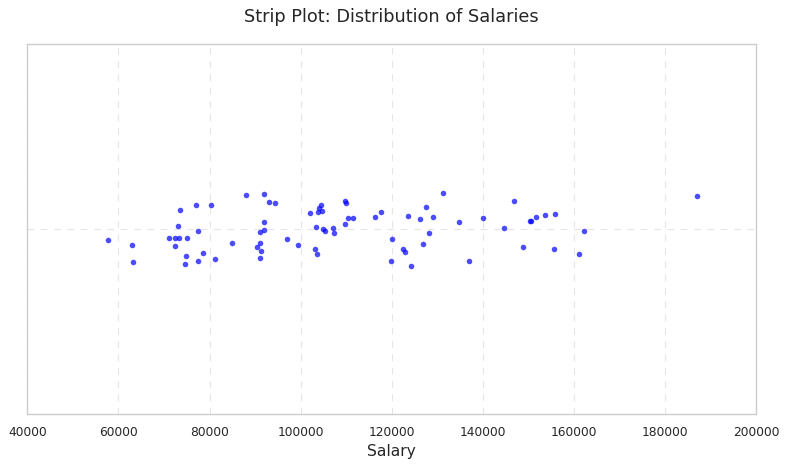

In [12]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the strip plot
sns.stripplot(x=dataset['salary'], jitter=True, marker='o', color='blue', alpha=0.7)
plt.xlabel('Salary', fontsize=14)
plt.title('Strip Plot: Distribution of Salaries', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*This visualization shows the overall distribution of salaries across all entries in the dataset. This plot reveals that salaries are dispersed across a wide range without significant clustering at specific values. This indicates a diverse salary structure within the dataset, suggesting that the organization may have a varied compensation strategy, catering to different roles and levels within the workforce.*

**Stripplot over categories**

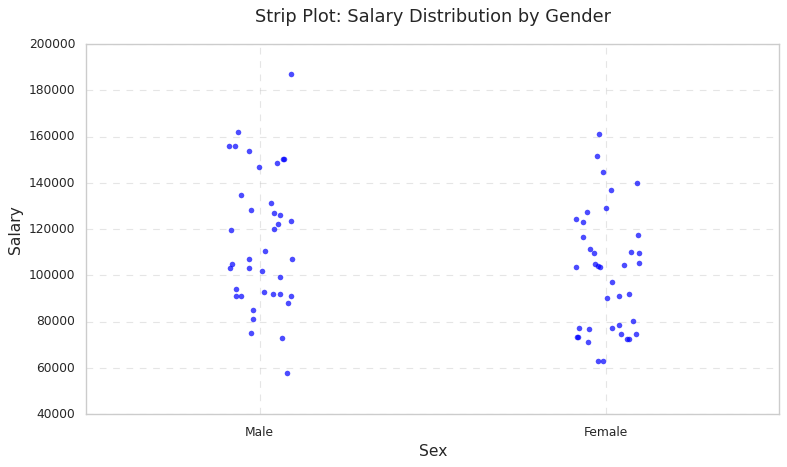

In [13]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the strip plot with categories
sns.stripplot(x=dataset['sex'], y=dataset['salary'], data=dataset, jitter=True, marker='o', color='blue', alpha=0.7)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Strip Plot: Salary Distribution by Gender', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*This visualization shows the salary ranges for male and female employees, which span from approximately 60,000 to 180,000. There is a noticeable concentration of salaries between 80,000 and 120,000 for both genders, indicating that most employees fall within this range. This suggests that while salaries vary widely, the central tendency is similar for both male and female employees.*

**Stripplot over Discpline categories**


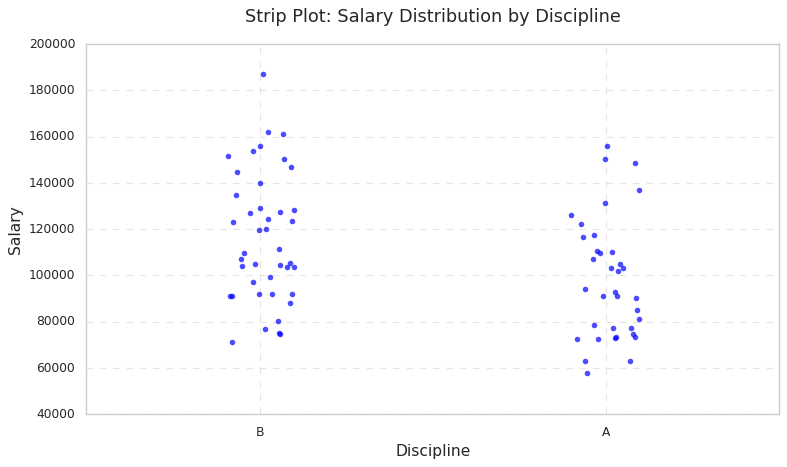

In [14]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the strip plot with categories
sns.stripplot(x=dataset['discipline'], y=dataset['salary'], data=dataset, jitter=True, marker='o', color='blue', alpha=0.7)
plt.xlabel('Discipline', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Strip Plot: Salary Distribution by Discipline', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Stripplot over rank categories**


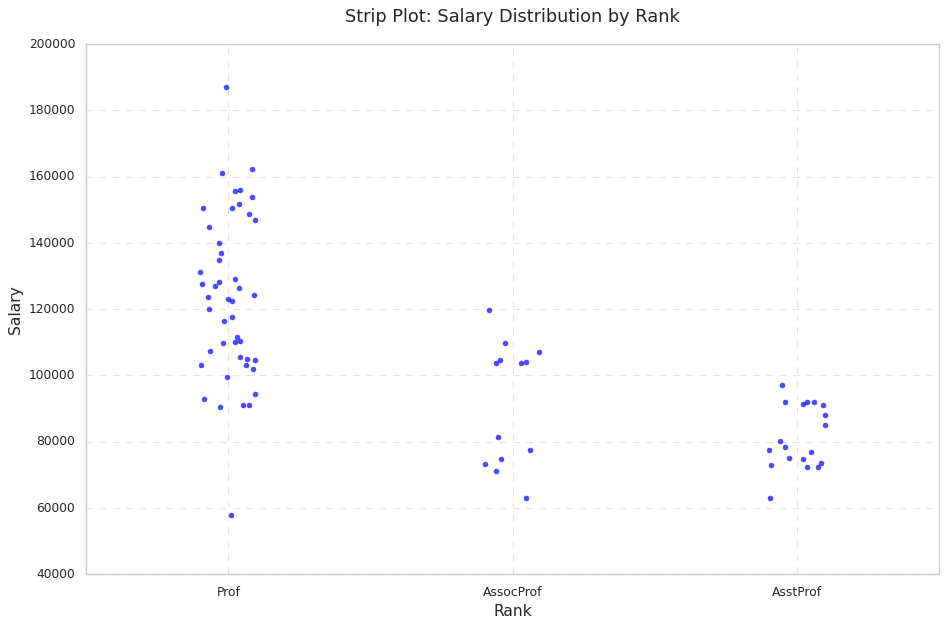

In [15]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plot the strip plot
sns.stripplot(x=dataset['rank'], y=dataset['salary'], data=dataset, jitter=True, marker='o', color='blue', alpha=0.7)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Strip Plot: Salary Distribution by Rank', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*The strip plot shows salary distributions across ranks using individual data points. Professors' salaries range widely, mostly above
 $120,000, with high outliers. Associate Professors' salaries are concentrated between $80,000 and $120,000. Assistant Professors' salaries cluster between $60,000 and $100,000. Professors have the most significant salary range.*








#Box Plot


**Combined Box Plot and Strip Plot Visualization**

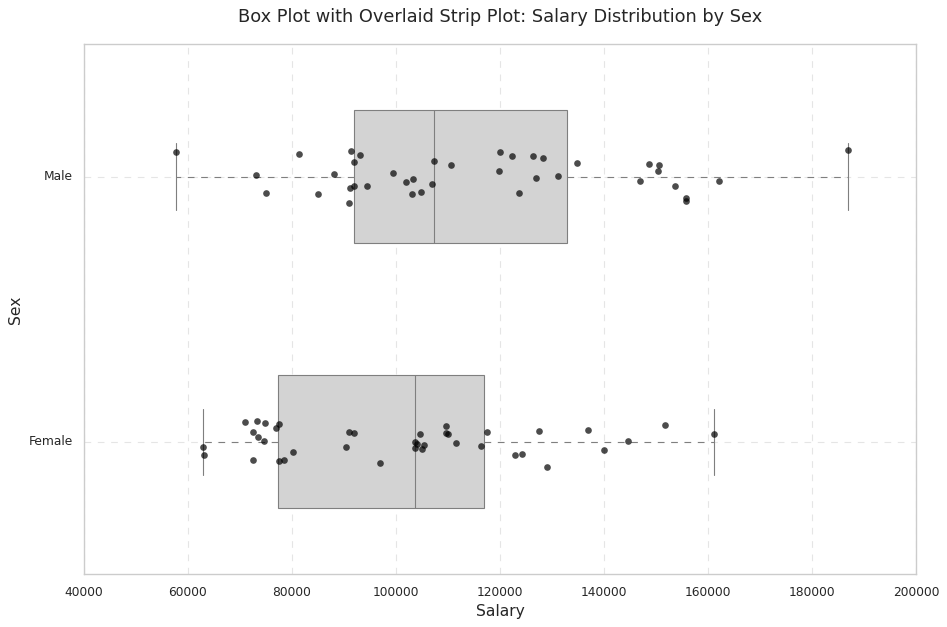

In [16]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Draw the box plot
sns.boxplot(x='salary', y='sex', data=dataset, whis=np.inf, color='lightgray', width=0.5)

# Overlay the strip plot on top of the box plot
sns.stripplot(x='salary', y='sex', data=dataset, jitter=True, color='black', alpha=0.7, size=6)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Sex', fontsize=14)
plt.title('Box Plot with Overlaid Strip Plot: Salary Distribution by Sex', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*The plot combines a box plot with an overlaid strip plot to display individual salary data points for males and females. This visualization confirms the trend that male salaries are generally higher than female salaries. The individual points reveal a higher concentration of male salaries at the upper end, contributing to the wider salary range observed for males.*

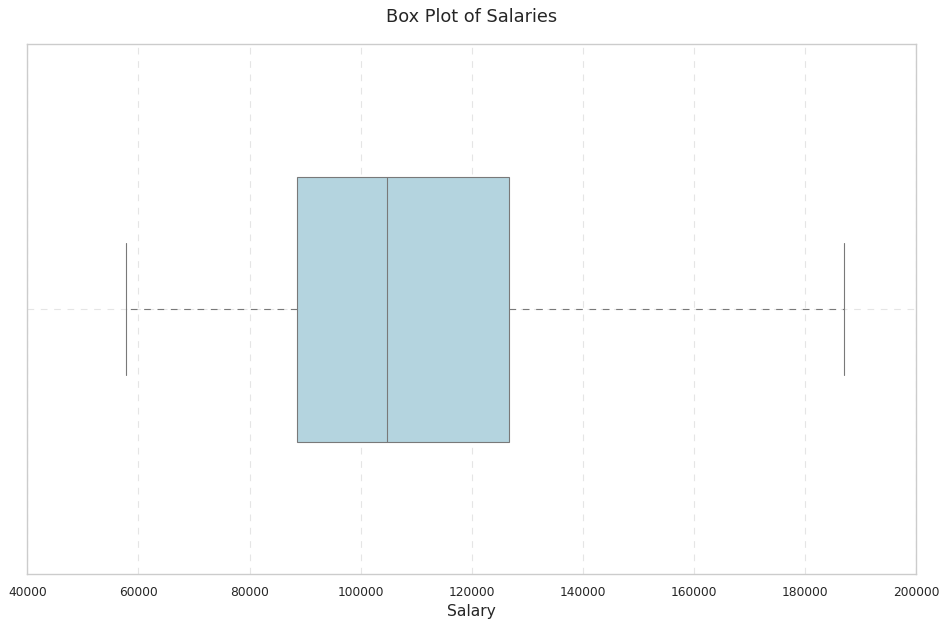

In [17]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x=dataset['salary'], whis=2, color='lightblue', width=0.5)
plt.xlabel('Salary', fontsize=14)
plt.title('Box Plot of Salaries', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*The box plot shows the overall salary distribution. Salaries range from approximately $60,000 to over $180,000, with a median around $120,000. The distribution is fairly symmetric, indicating that most salaries cluster around the median value, with fewer outliers.*

<ipython-input-18-4dcff7373b8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rank', y='salary', data=dataset, palette='Set2')


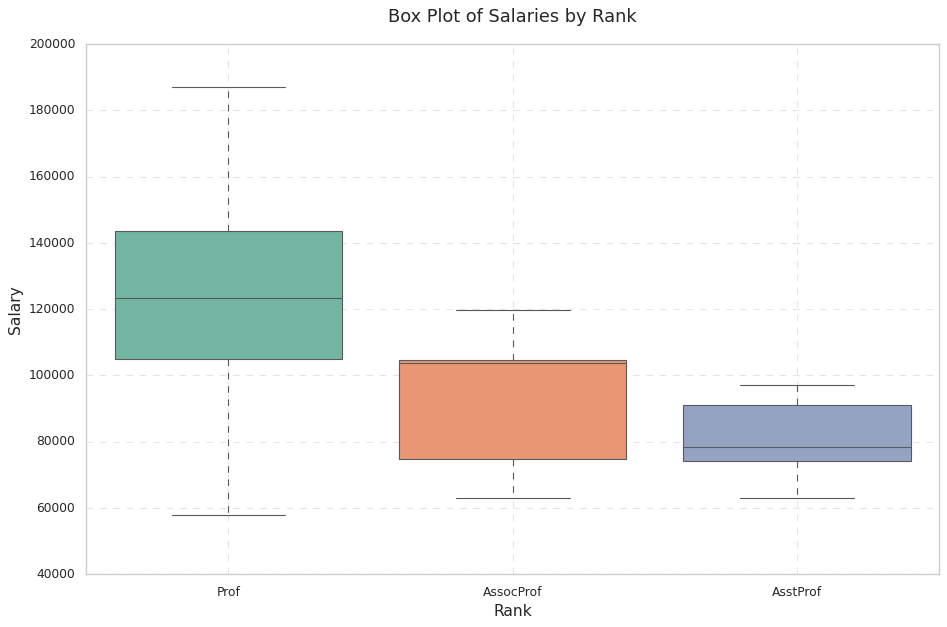

In [18]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the box plot for salaries by rank
sns.boxplot(x='rank', y='salary', data=dataset, palette='Set2')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Box Plot of Salaries by Rank', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*The Box plot shows salary distributions across ranks using individual data points. Professors' salaries range widely, mostly above  120,000,withhighoutliers.AssociateProfessors′salariesareconcentratedbetween 80,000 and  120,000.AssistantProfessors′salariesclusterbetween 60,000 and $100,000. Professors have the most significant salary range.*

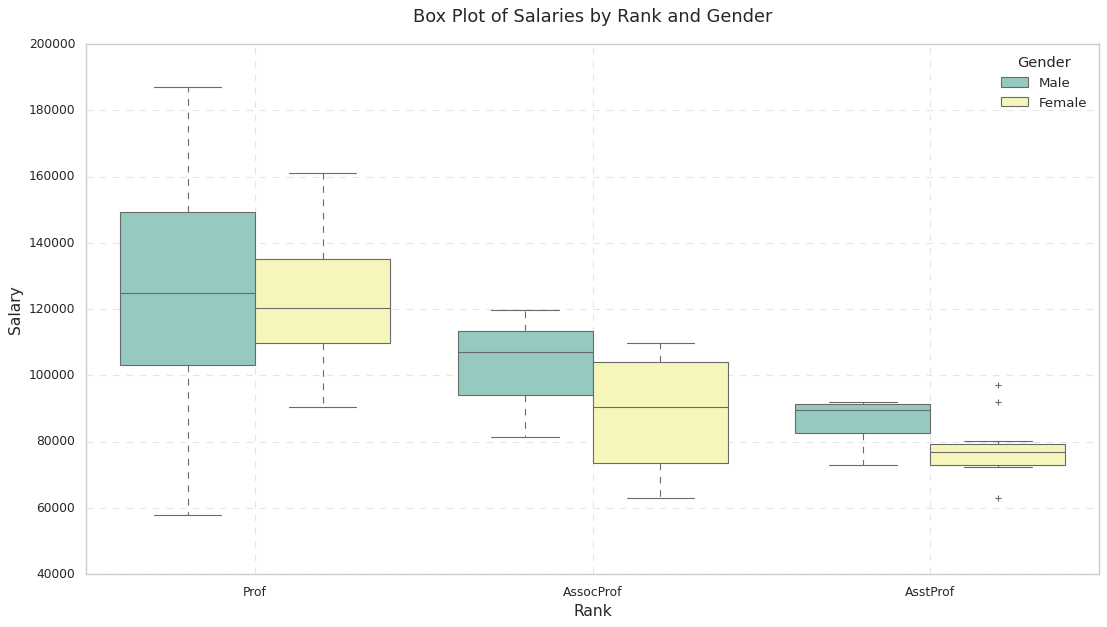

In [19]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create the box plot for salaries by rank with gender differentiation
sns.boxplot(x='rank', y='salary', hue='sex', data=dataset, palette='Set3')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Box Plot of Salaries by Rank and Gender', fontsize=16, pad=20)

# Add a legend
plt.legend(title='Gender', title_fontsize='13', fontsize='12')

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*The first box plot shows salary distributions for different academic ranks (Professor, Associate Professor, Assistant Professor) by gender. Male professors generally have higher salaries than female professors, with a median around $130,000   compared
to $120,000 for females. For Associate Professors, the median salaries are closer between genders, with males having slightly higher and broader ranges. Assistant Professor salaries are similar for both genders, with minor differences in medians and few outliers.*

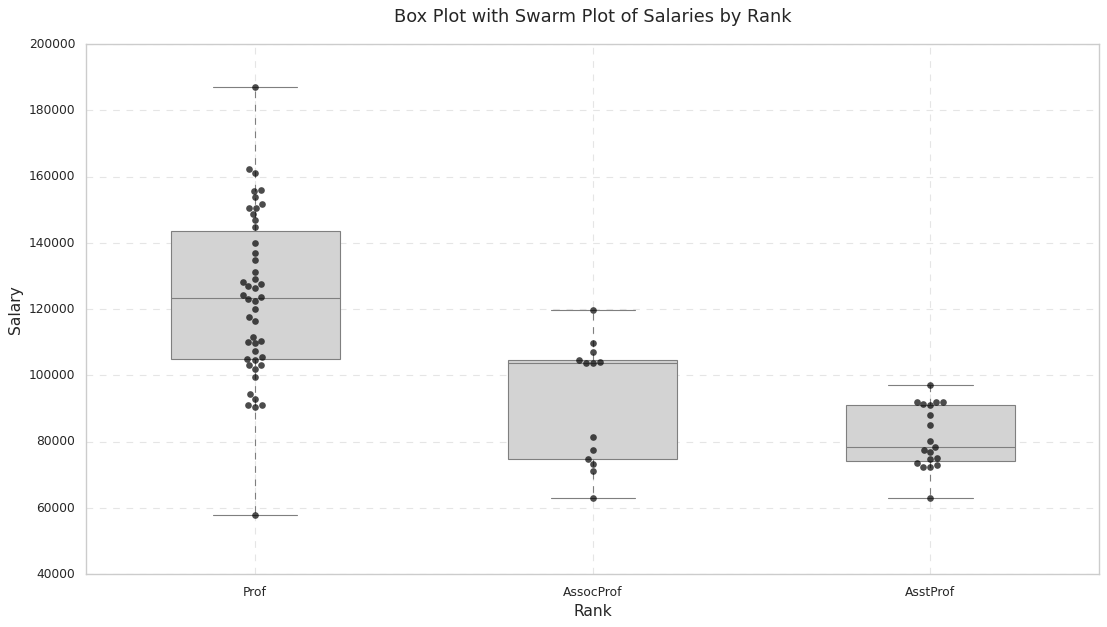

In [20]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create the box plot for salaries by rank
sns.boxplot(x='rank', y='salary', data=dataset, color='lightgray', width=0.5)

# Overlay the swarm plot on top of the box plot
sns.swarmplot(x='rank', y='salary', data=dataset, color='black', alpha=0.7, size=6)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Box Plot with Swarm Plot of Salaries by Rank', fontsize=16, pad=20)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*This plot combines box plots and swarm plots to show salary distributions by rank. Professors have the highest median salary and the broadest salary range, indicating variability based on experience and tenure. Associate and Assistant Professors exhibit less salary variation. This visualization highlights the hierarchical nature of academic salaries and broader compensation ranges among Professors.*

#Swarm Plot


**Swarm Plot of Salaries by Gender and Rank**

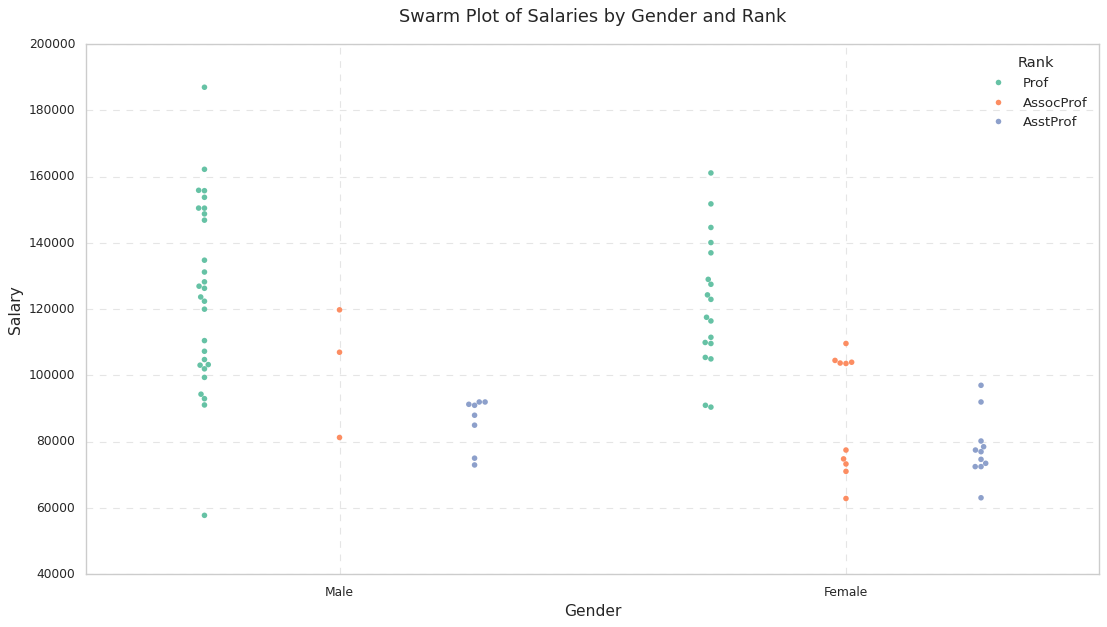

In [21]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create the swarm plot for salaries by gender with rank differentiation
sns.swarmplot(x='sex', y='salary', hue='rank', data=dataset, palette="Set2", dodge=True)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Swarm Plot of Salaries by Gender and Rank', fontsize=16, pad=20)
plt.legend(title='Rank', title_fontsize='13', fontsize='12')

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



*The swarm plot allows for a clearer comparison of salary distributions by gender and rank. It shows that male Professors generally have higher salaries than female Professors. At the Associate and Assistant Professor levels, salaries for males and females are more closely aligned, though some variation remains. This separation highlights the gender disparity more distinctly*

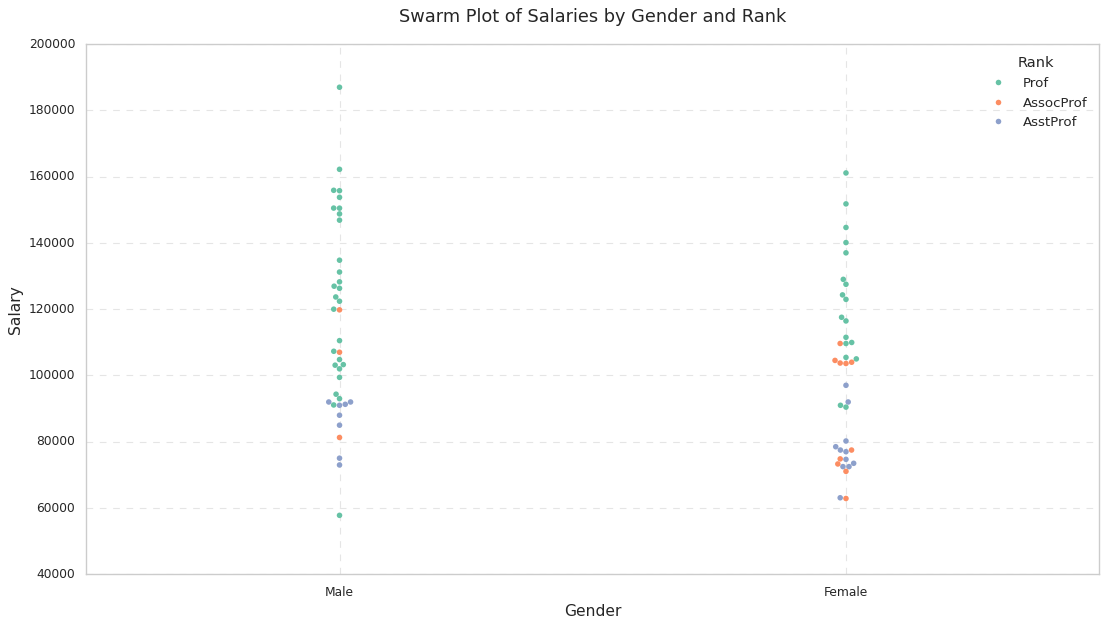

In [22]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create the swarm plot for salaries by gender with rank differentiation
sns.swarmplot(x='sex', y='salary', hue='rank', data=dataset, palette="Set2", dodge=False)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Swarm Plot of Salaries by Gender and Rank', fontsize=16, pad=20)
plt.legend(title='Rank', title_fontsize='13', fontsize='12')

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



*This combined swarm plot shows salary distributions across academic ranks (Professor, Associate Professor, Assistant Professor) and genders (Male, Female). It reveals higher salaries concentrated among Professors, with male Professors showing a broader distribution at the high end. There are fewer female faculty members, especially in senior positions, indicating potential gender imbalance.*

#Joint Plot
A joint plot combines more than one plot to visualize the selected patterns



**Joint Plot of Salary and Service Years with Regression Line**

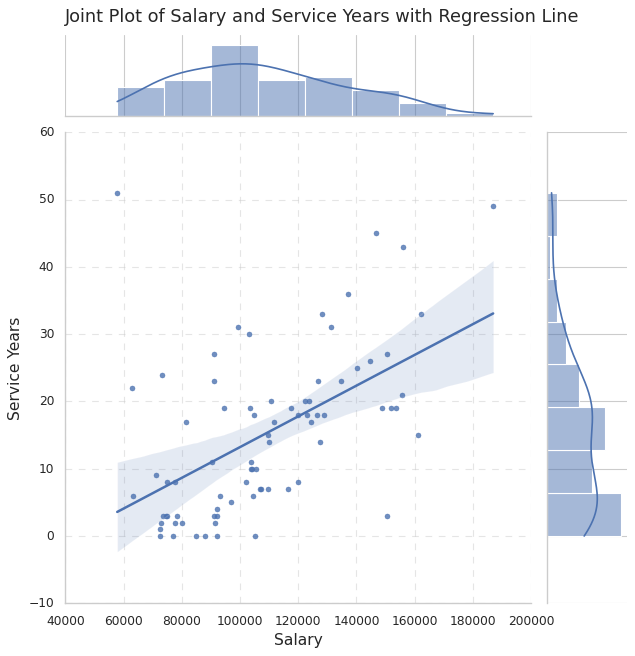

In [23]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")

# Create the joint plot with regression line
g = sns.jointplot(x='salary', y='service', data=dataset, kind='reg', height=8, color='b')
g.set_axis_labels('Salary', 'Service Years', fontsize=14)
g.fig.suptitle('Joint Plot of Salary and Service Years with Regression Line', fontsize=16, y=1.02)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Joint Plot of Salary and Service Years with hexagonal bins**

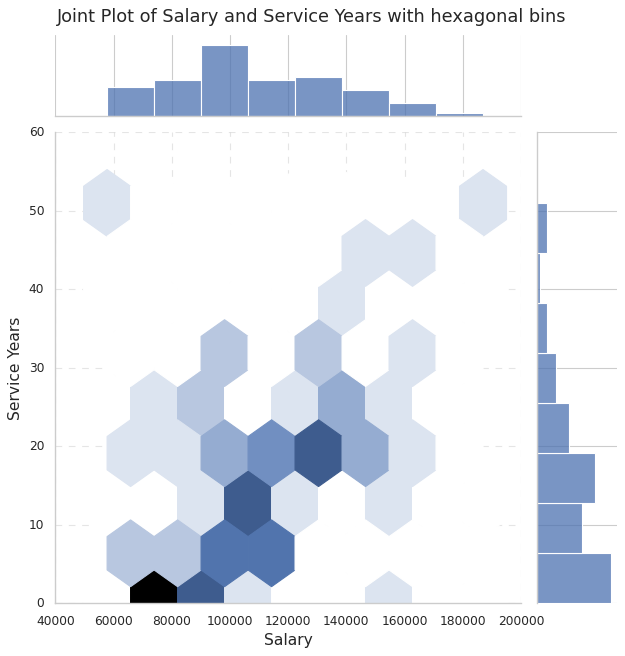

In [24]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")

# Create the joint plot with regression line
g = sns.jointplot(x='salary', y='service', data=dataset, kind='hex', height=8, color='b')
g.set_axis_labels('Salary', 'Service Years', fontsize=14)
g.fig.suptitle('Joint Plot of Salary and Service Years with hexagonal bins', fontsize=16, y=1.02)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


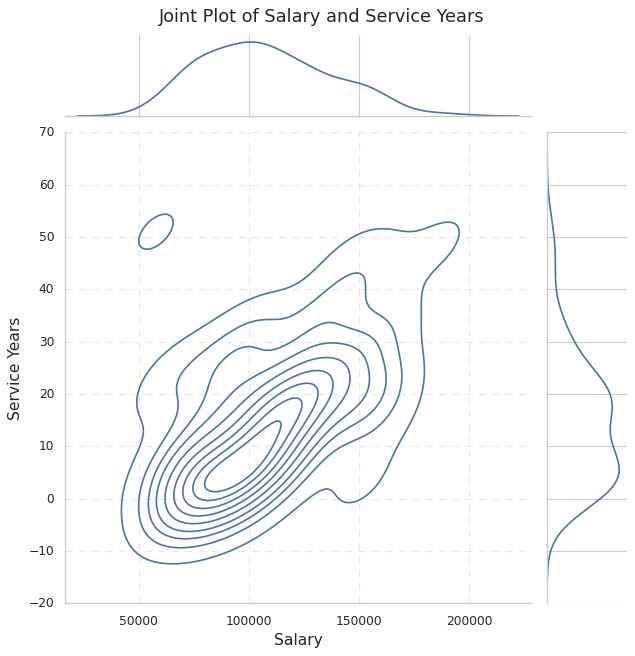

In [25]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")

# Create the joint plot with regression line
g = sns.jointplot(x='salary', y='service', data=dataset, kind='kde', height=8, color='b')
g.set_axis_labels('Salary', 'Service Years', fontsize=14)
g.fig.suptitle('Joint Plot of Salary and Service Years', fontsize=16, y=1.02)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


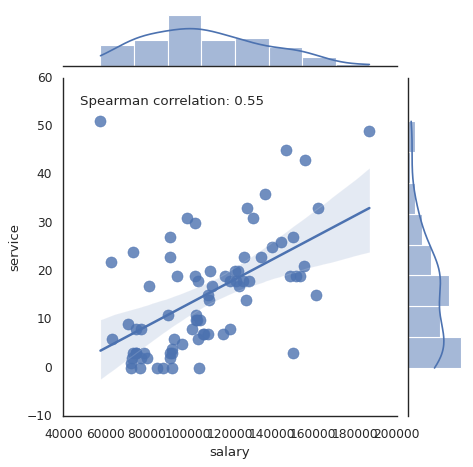

In [26]:
# Create a jointplot with Seaborn
sns.set(style="white", color_codes=True)
g = sns.jointplot(x='salary', y='service', data=dataset, kind='reg', scatter_kws={'s': 100})

# Calculate Spearman correlation coefficient
rs, _ = spearmanr(dataset['salary'], dataset['service'])

# Annotate the plot with correlation coefficient
plt.text(0.05, 0.95, f'Spearman correlation: {rs:.2f}', transform=g.ax_joint.transAxes, fontsize=12,
         verticalalignment='top')

# Display the plot
plt.show()

**Joint Plot of Salary and Service Years**

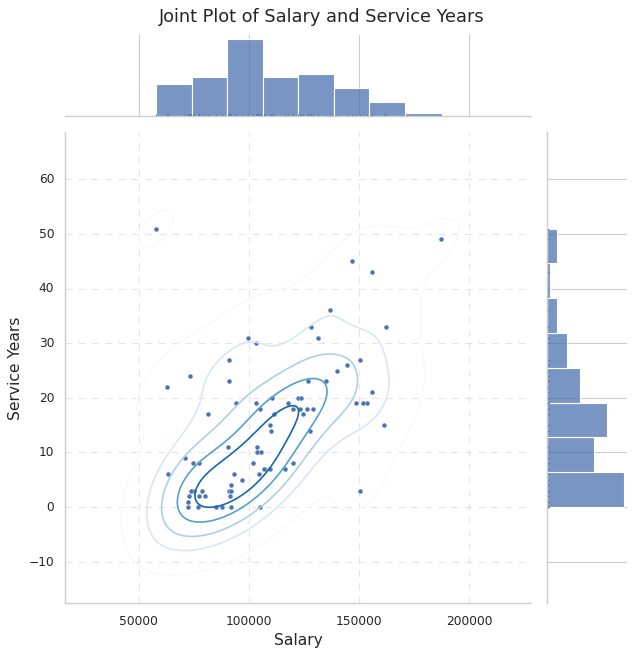

In [27]:
# Set the style for seaborn and matplotlib
sns.set(style="whitegrid")

# Create the joint plot with KDE contours
g = sns.jointplot(x='salary', y='service', data=dataset, kind='scatter', height=8)

# Overlay KDE contours on the joint plot
g.plot_joint(sns.kdeplot, n_levels=6, cmap='Blues').plot_marginals(sns.rugplot)
g.set_axis_labels('Salary', 'Service Years', fontsize=14)
g.fig.suptitle('Joint Plot of Salary and Service Years', fontsize=16, y=1.02)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#Matplotlib Plot:


**Matplotlib Line Plotting**


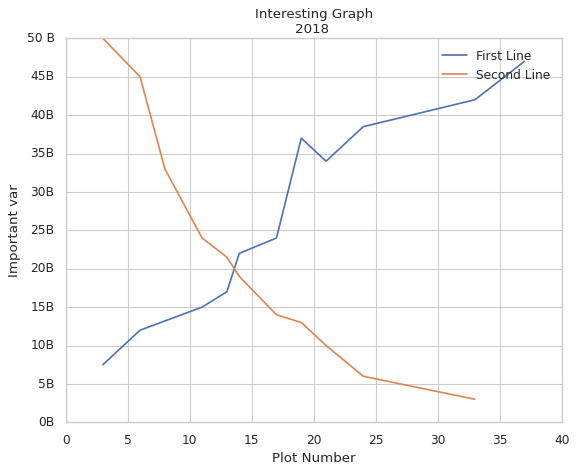

In [28]:
x =[3,6,8,11,13,14,17,19,21,24,33,37]
y = [7.5,12,13.2,15,17,22,24,37,34,38.5,42,47]
x2 =[3,6,8,11,13,14,17,19,21,24,33]
y2 = [50,45,33,24,21.5,19,14,13,10,6,3]
plt.plot(x,y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph\n2018 ')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50],['0B','5B','10B','15B','20B','25B','30B','35B','40B','45B','50 B'])
plt.legend()
plt.show()

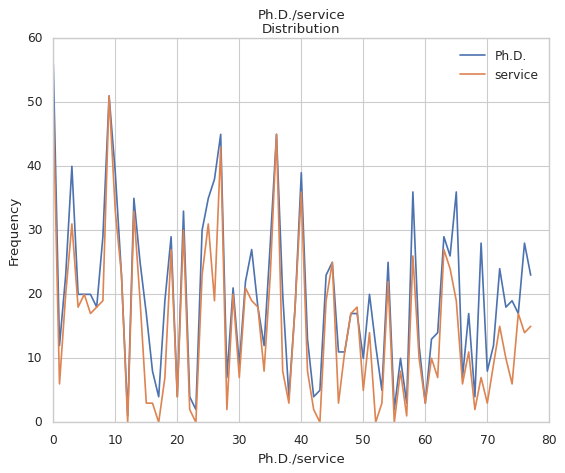

In [29]:
plt.plot(phd, label='Ph.D.')
plt.plot(service, label='service')
plt.xlabel('Ph.D./service')
plt.ylabel('Frequency')
plt.title('Ph.D./service\nDistribution')
plt.legend()
plt.show()



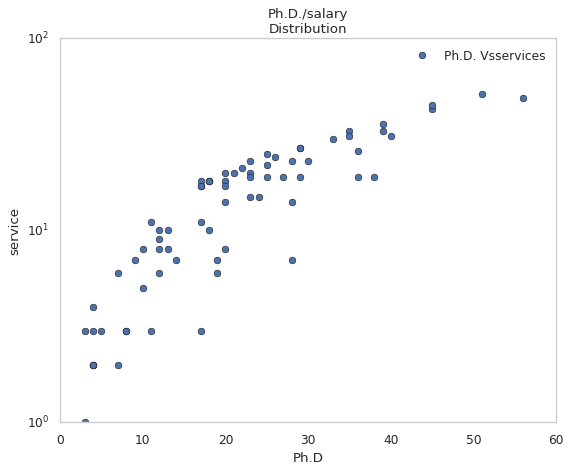

In [30]:
plt.plot(phd, service, 'bo', label="Ph.D. Vsservices", lw=10)
plt.grid()
plt.legend()
plt.xlabel('Ph.D')
plt.ylabel('service')
plt.title('Ph.D./salary\nDistribution')
plt.yscale('log')


##Bar Chart




**Matplotlib Bar Chart Plotting**


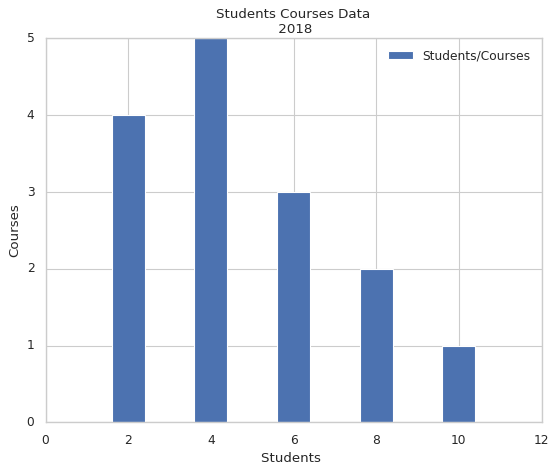

In [31]:
Students = [2,4,6,8,10]
Courses = [4,5,3,2,1]
plt.bar(Students,Courses, label="Students/Courses")
plt.xlabel('Students ')
plt.ylabel('Courses')
plt.title('Students Courses Data\n 2018')
plt.legend()
plt.show()

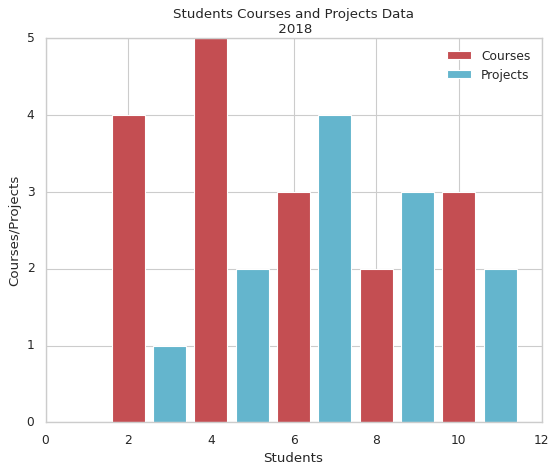

In [32]:
Students = [2,4,6,8,10]
Courses = [4,5,3,2,3]
stds = [3,5,7,9,11]
Projects = [1,2,4,3,2]
plt.bar(Students, Courses, label="Courses", color='r')
plt.bar(stds, Projects, label="Projects", color='c')
plt.xlabel('Students')
plt.ylabel('Courses/Projects')
plt.title('Students Courses and Projects Data\n 2018')
plt.legend()
plt.show()


# Histogram Plot



**Matplotlib Histogram Plotting**


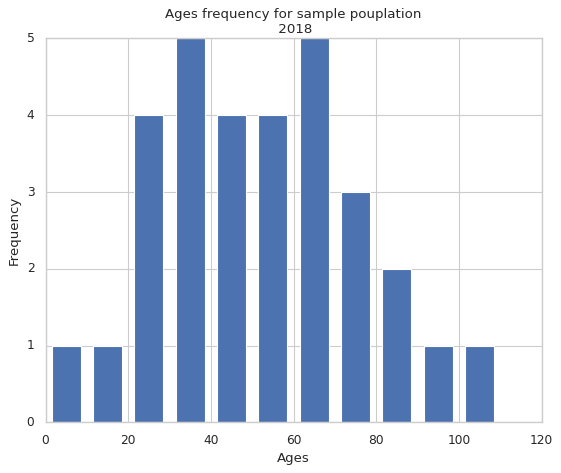

In [33]:
Ages = [22.5, 10, 55, 8, 62, 45, 21, 34, 42, 45, 99,75, 82,77, 55, 43, 66, 66, 78, 89, 101, 34, 65, 56,25, 34,52, 25, 63, 37, 32]
binsx = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.hist(Ages, bins=binsx, histtype='bar', rwidth=0.7)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Ages frequency for sample pouplation\n 2018')
plt.show()


*Visualize service years since Ph.D. had attained*

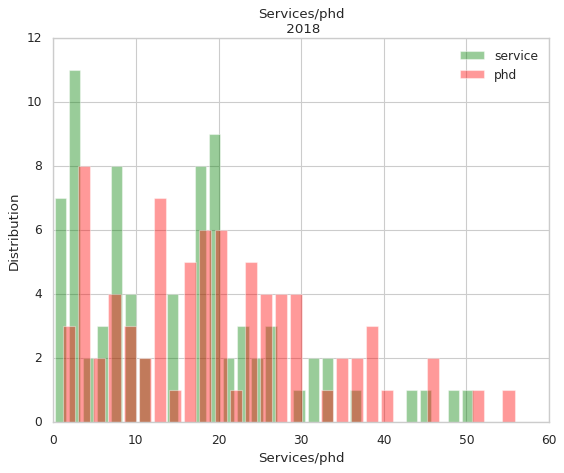

In [34]:
plt.hist(service, bins=30, alpha=0.4, rwidth=0.8,color='green', label='service')
plt.hist(phd, bins=30, alpha=0.4, rwidth=0.8,
color='red', label='phd')
plt.xlabel('Services/phd')
plt.ylabel('Distribution')
plt.title('Services/phd\n 2018')
plt.legend(loc='upper right')
plt.show()

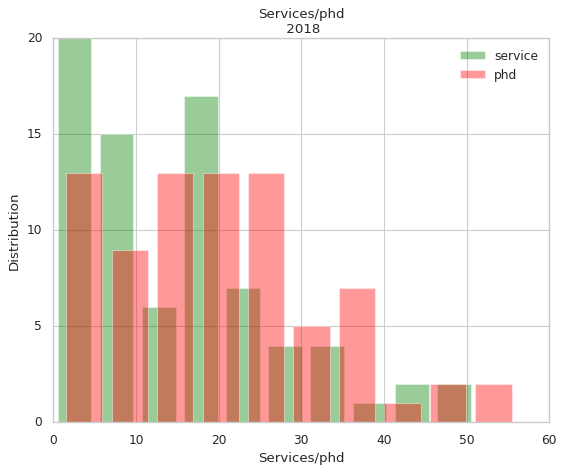

In [35]:
plt.hist(service, bins=10, alpha=0.4, rwidth=0.8,color='green', label='service')
plt.hist(phd, bins=10, alpha=0.4, rwidth=0.8,color='red', label='phd')
plt.xlabel('Services/phd')
plt.ylabel('Distribution')
plt.title('Services/phd\n 2018')
plt.legend(loc='upper right')
plt.show()

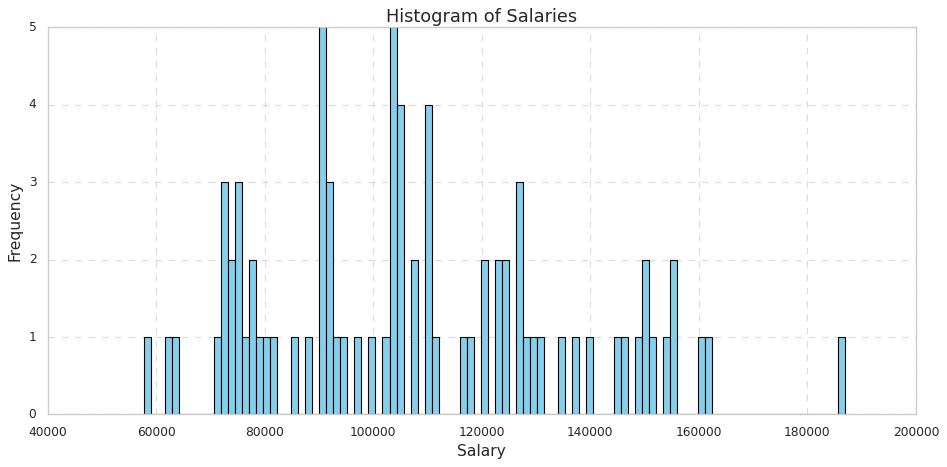

In [36]:
# Extract the 'salary' column from the dataset
salaries = dataset['salary']

# Create a histogram of salaries
plt.figure(figsize=(12, 6))
plt.hist(salaries, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Salaries', fontsize=16)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Scatter Plot


**Matplotlib Scatter Plot**


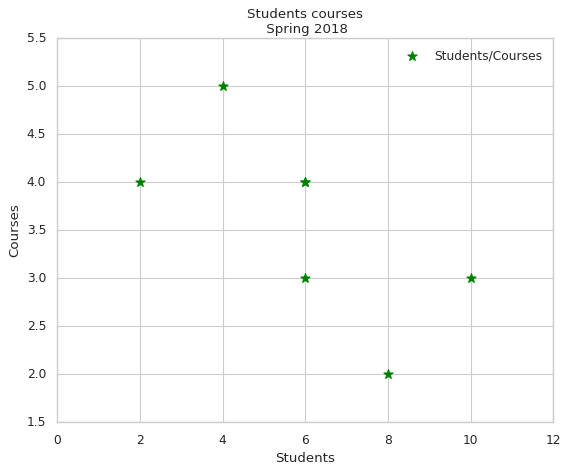

In [37]:
Students = [2,4,6,8,6,10, 6]
Courses = [4,5,3,2,4, 3, 4]
plt.scatter(Students,Courses, label='Students/Courses',color='green', marker='*', s=75 )
plt.xlabel('Students')
plt.ylabel('Courses')
plt.title('Students courses\n Spring 2018')
plt.legend()

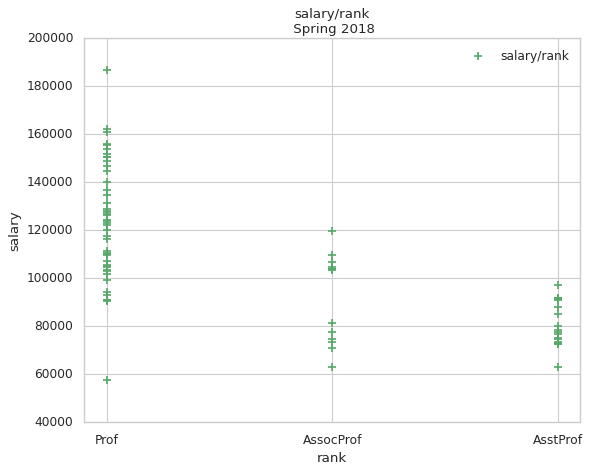

In [38]:
plt.scatter(rank,salary, label='salary/rank',color='g', marker='+', s=50 )
plt.xlabel('rank')
plt.ylabel('salary')
plt.title('salary/rank\n Spring 2018')
plt.legend()
plt.show()

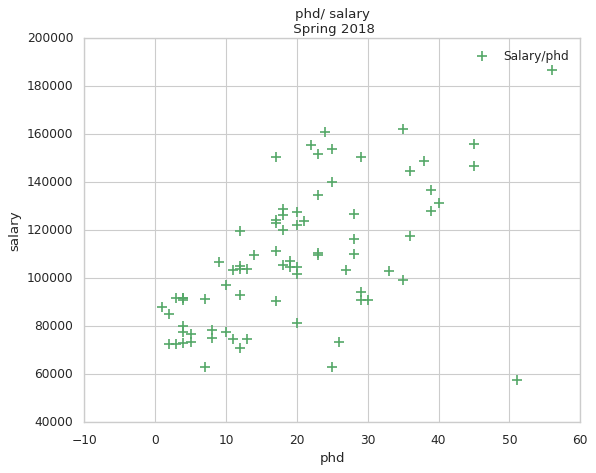

In [39]:
plt.scatter(phd,salary, label='Salary/phd', color='g',marker='+', s=80 )
plt.xlabel('phd')
plt.ylabel('salary')
plt.title('phd/ salary\n Spring 2018')
plt.legend()
plt.show()


#Stack Plot







**Persons Weekly Spent Time per activities usingMatplotlib Stack Plot**

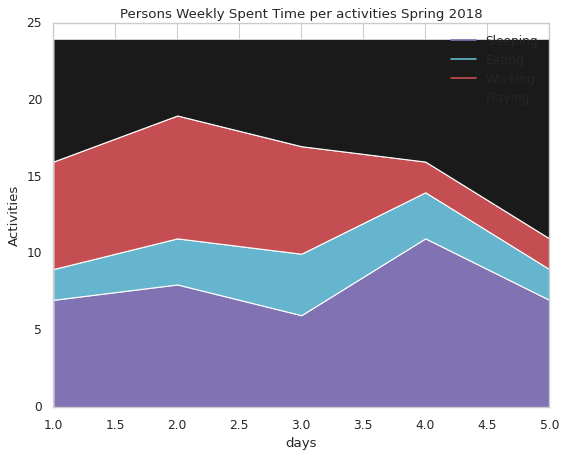

In [40]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]
plt.plot([],[], color='m', label='Sleeping')
plt.plot([],[], color='c', label='Eating')
plt.plot([],[], color='r', label='Working')
plt.plot([],[], color='k', label='Playing')
plt.stackplot(days, sleeping, eating, working ,playing, colors=['m','c', 'r', 'k'])
plt.xlabel('days')
plt.ylabel('Activities')
plt.title('Persons Weekly Spent Time per activities Spring 2018')
plt.legend()
plt.show()

#Pie Chart



**Persons Weekly Spent Time per activities usingMatplotlib Pie Chart**

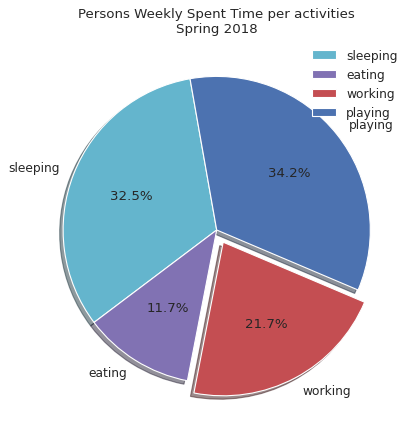

In [41]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]
slices = [39,14,26,41]
activities = ['sleeping', 'eating', 'working','playing']
cols = ['c','m','r', 'b','g']
plt.pie(slices,
labels= activities,
colors= cols,
startangle=100,
shadow=True,
explode = (0.0,0.0,0.09,0),
autopct = '%1.1f%%')
plt.title('Persons Weekly Spent Time per activities\nSpring 2018')
plt.legend()
plt.show()


#Summary
This chapter covered how to plot data from different collection structures.
You learned the following:

– How to directly plot data from a series, data frame, or panel
using Python plotting tools such as line plots, bar plots, pie
charts, box plots, histogram plots, and scatter plots

– How to implement the Seaborn plotting system using
strip plotting, box plotting, swarm plotting, and joint
plotting

– How to implement Matplotlib plotting using line plots,
bar charts, histogram plots, scatter plots, stack plots, and
pie charts

The next chapter will cover the techniques you’ve studied in this book via
two different case studies; it will make recommendations, and much more

#Exercises and Answers
**1.** **Create 500 random temperature readings for sixcities over a season and then plot the generated data using Matplotlib.**


Plotting the Temperature Data of Six Cities

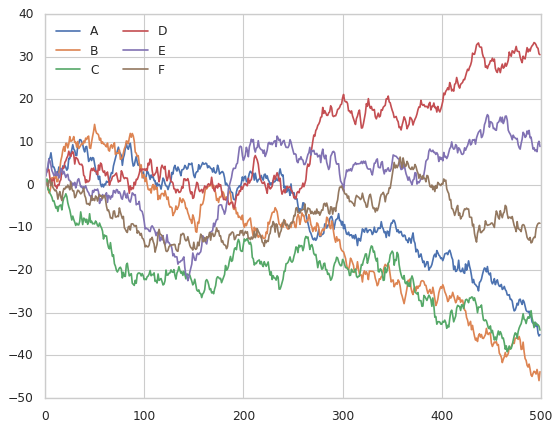

In [42]:
# Create temperature data
rng = np.random.RandomState(0)
season1 = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(season1)
plt.legend('ABCDEF', ncol=2, loc='upper left');




**2.** **Load the well-known Iris data set, which lists measurements of petals and sepals of three iris species. Then plot the correlations between each pair using the .pairplot() method.**

Pair Correlations


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


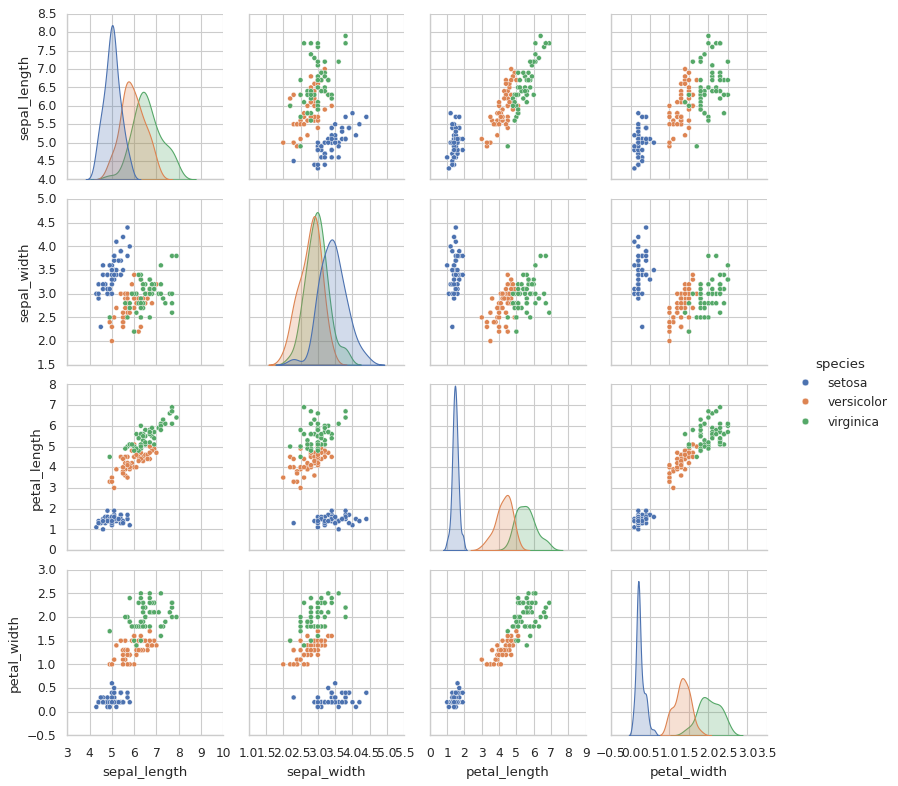

In [43]:
iris = sns.load_dataset("iris")
iris.head()
sns.pairplot(iris, hue='species', size=2.5);

**3.** **Load the well-known Tips data set, which shows thenumber of tips received by restaurant staff based on
various indicator data; then plot the percentage of tips per bill according to staff gender.**


First five records in the Tips dataset


In [44]:
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


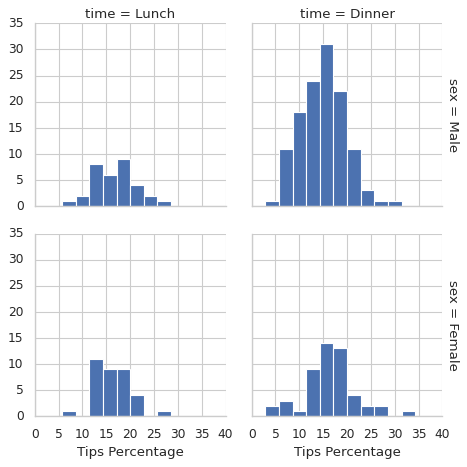

In [45]:
tips['Tips Percentage'] = 100 * tips['tip'] /tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time",margin_titles=True)
grid.map(plt.hist, "Tips Percentage", bins=np.
linspace(0, 40, 15));


**4.** **Load the well-known Tips data set, which shows the number of tips received by restaurant staff based on
various indicator data; then implement the factorplots to visualize the total bill per day according to
staff gender.**


Implementing Factor Plotting

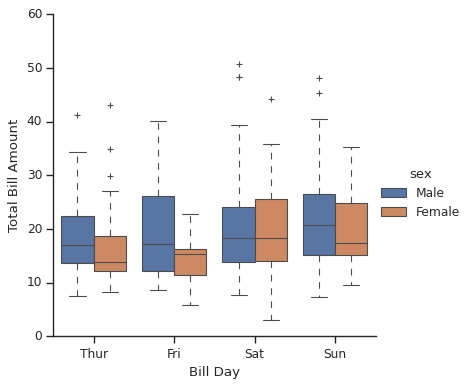

In [46]:
tips = sns.load_dataset('tips')
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Bill Day", "Total Bill Amount")

plt.show()


**5.** **Reimplement the previous exercise using the Seaborn joint plot distributions.**


Implementing Joint Plot Distributions

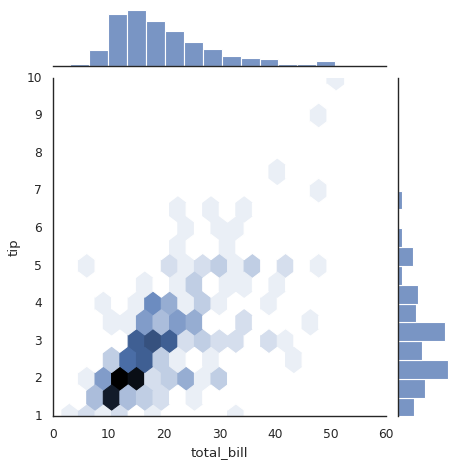

In [47]:
tips = sns.load_dataset('tips')

with sns.axes_style('white'):
 sns.jointplot(x = "total_bill", y = "tip",data=tips, kind='hex')
